In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv("data/sample_prices.csv")
prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [4]:
returns = prices.pct_change()
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


In [5]:
returns = returns.dropna()
returns.head()

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381


In [6]:
# get the volatility
# a measure of risk
# this is the sample std deviation
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [7]:
# let's calculate the same from first principle
# the numbers dont match
# we are computing the population std deviation
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [10]:
# the std deviation uses a numerator which is n-1
# we are using n
# let's fix that
deviations = returns - returns.mean()
squared_deviations = deviations**2
number_of_obs = squared_deviations.shape[0]
variance = squared_deviations.sum()/(number_of_obs - 1)
volatility = np.sqrt(variance)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [11]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [12]:
# This is the volatility based on monthly data
# We need to annualize this

returns.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [13]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                        index_col=0,
                        parse_dates=True,
                        na_values=-99.99)

returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [14]:
columns = ["Lo 10", "Hi 10"]

returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [15]:
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [16]:
returns.columns = ["small_cap", "large_cap"]

In [17]:
returns.head()

,small_cap,large_cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


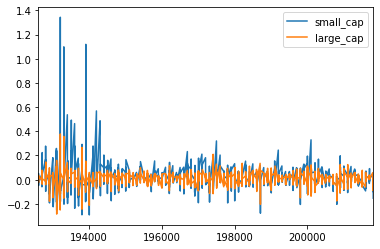

In [19]:
returns.plot.line()

In [21]:
returns.std()

small_cap    0.106288
large_cap    0.053900
dtype: float64

In [22]:
# annualize the monthly volatility
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

small_cap    0.368193
large_cap    0.186716
dtype: float64

In [23]:
# annualize the returns
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

small_cap    0.012986
large_cap    0.007423
dtype: float64

In [24]:
annualized_vol

small_cap    0.368193
large_cap    0.186716
dtype: float64

In [25]:
annualized_return = (return_per_month + 1)**12 - 1
annualized_return

small_cap    0.167463
large_cap    0.092810
dtype: float64

In [27]:
# Annualize return in one step
# 12 is the number of periods per year
annualized_return = (returns + 1).prod()**(12/n_months) - 1
annualized_return

small_cap    0.167463
large_cap    0.092810
dtype: float64

In [28]:
annualized_return/annualized_vol

small_cap    0.454825
large_cap    0.497063
dtype: float64

In [29]:
# risk free rate is incorrect
# we are assuming a flat rate for illustrative purposes
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

small_cap    0.373346
large_cap    0.336392
dtype: float64

In [30]:
#TODO
# Repeat this exercise for qunitiles